In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

<Axes: xlabel='class', ylabel='count'>

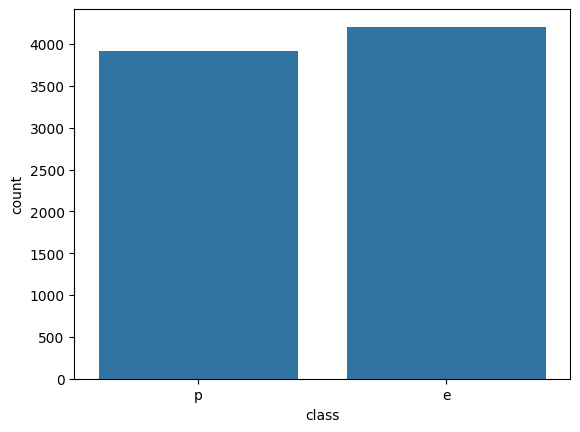

In [5]:
sns.countplot(data=df, x='class')

In [6]:
X = df.drop(columns=['class'], axis=1)
y = df['class']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Encode categorical variables
X_train_encoded = X_train.apply(LabelEncoder().fit_transform)
X_test_encoded = X_test.apply(LabelEncoder().fit_transform)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_encoded, y_train)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_encoded, y_train)


KNeighborsClassifier(n_neighbors=3)

In [9]:
y_pred_decision_tree = decision_tree.predict(X_test_encoded)
y_pred_knn = knn.predict(X_test_encoded)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(accuracy_score(y_test, y_pred_decision_tree))
print(accuracy_score(y_test, y_pred_knn))

1.0
0.9972307692307693


In [15]:
print(confusion_matrix(y_test, y_pred_decision_tree))
print(confusion_matrix(y_test, y_pred_knn))

[[1678    0]
 [   0 1572]]
[[1671    7]
 [   2 1570]]


In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1678
           p       1.00      1.00      1.00      1572

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250

